In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
</style>
<style>
span.toc-item-num{
display:none;
}
</style>
"""))

<b><font size="6" color="red">ch13. 데이터 시각화</font></b>

# 1절. 시각화 개요
- 시각화 라이브러리: matpoltlib, seaborn, folium(지도시각화)
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리 . 판다스 내부에 포함
- seaborn :  matplotlib 기반을 다양한 색, 테마, 차트 기능과 groupby 기능을 추가한 라이브러리

# 2절. matplotlib
- https://pypi.org/project/matplotlib/
- 
## 2.1 패키지 import 및 기본 설정

In [2]:
import matplotlib
matplotlib.__version__

'3.7.0'

In [3]:
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

In [7]:
%matplotlib inline
%config InlineBackend.figure_format= "retina"
# 한글설정
plt.rc('font',family='Malgun Gothic') # 윈도우즈
plt.rc('axes',unicode_minus=False)# 축의 -깨짐방지
# warnig 감추기
import warnings
#warnings.filterwarnings(action='ignore') #안보이게
warnings.filterwarnings(action='default') #보이게

import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 그래프 그리기
- matplotlib 으로 그래프를 그리기 위해서 다음의 단계
    1) 데이터 준비<br>
    2) 그래프 생성<br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장

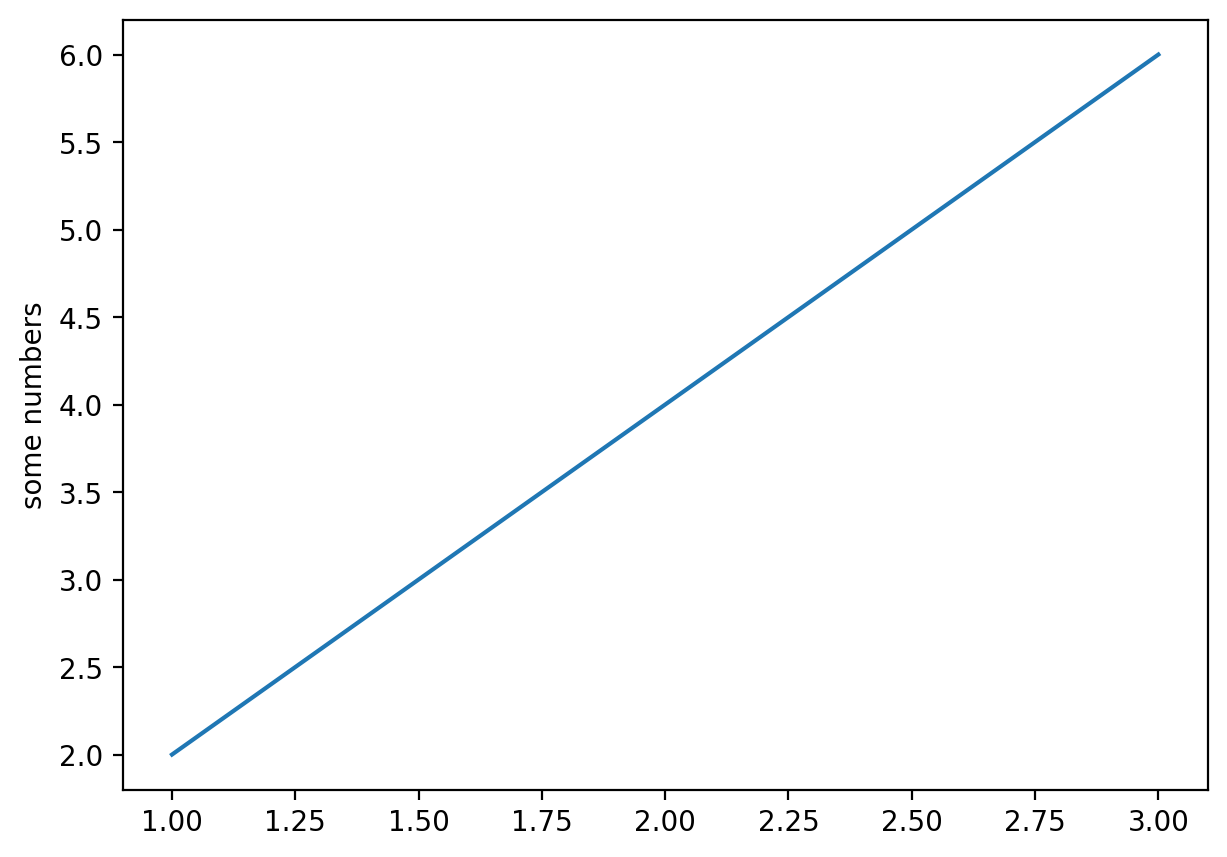

In [18]:
plt.figure(figsize=(7,5)) # 그래프 객체 생성, 사이즈는 인치
plt.plot([1,2,3,],[2,4,6]) # 그래프 함수
plt.ylabel('some numbers') # 그래프 커스터마이징
plt.show()

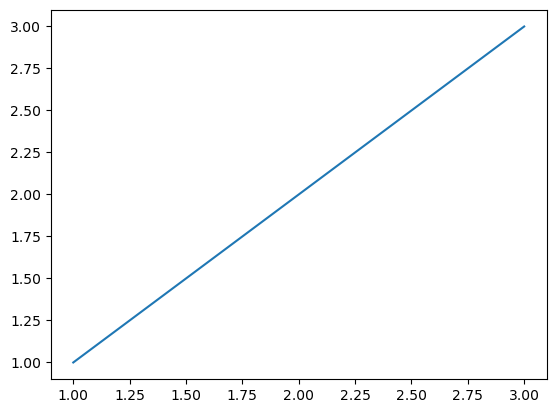

In [16]:
plt.plot([1,2,3],[1,2,3])

## 2.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯 추가



In [21]:
import numpy as np
x = np.arange(0,10,0.01)
x.shape

(1000,)

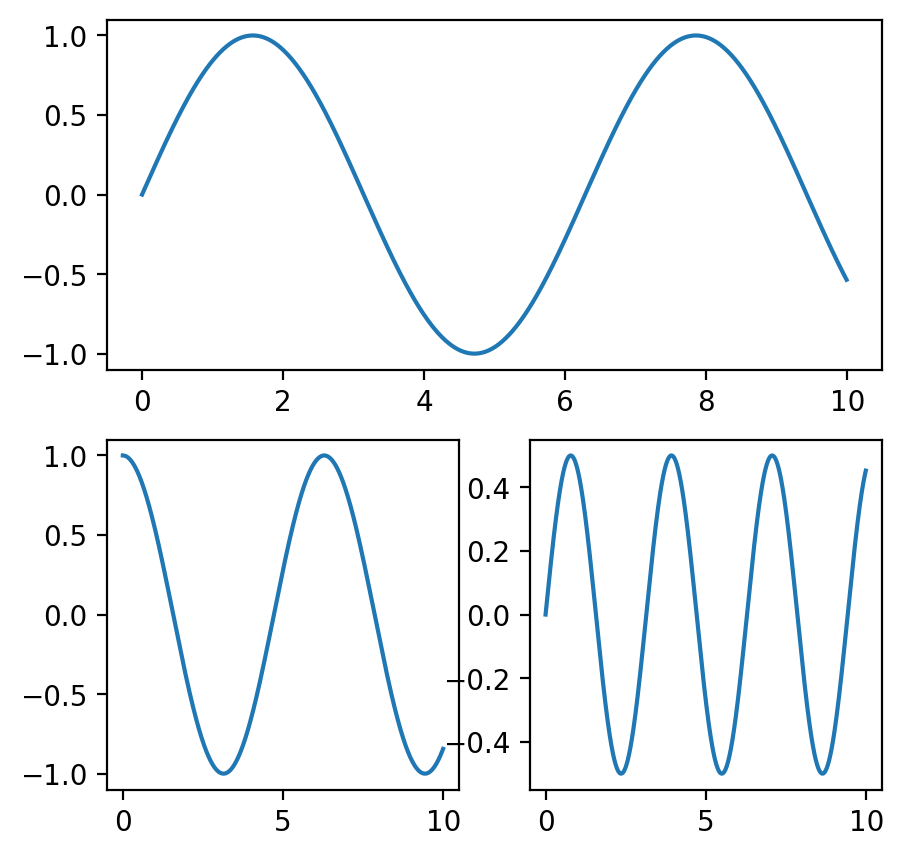

In [28]:
plt.figure(figsize=(5,5))
plt.subplot(2,1,1) # 2행 1열의 subplot에서 1번째 subplot에 다음과 같이 그래프 그려
plt.plot(x,np.sin(x))
plt.subplot(2,2,3) # 2행 2열의 subplot에서 3번째 subplot에서 다음과 같이 그래프
#plt.subplot(223)
plt.plot(x,np.cos(x))
plt.subplot(224)  # 2행 2열의 subplot에서 4번째 subplot에서 다음과 같이 그래프
plt.plot(x, np.sin(x)*np.cos(x))
plt.show()


### 2) subplots()함수로 서브 플롯 추가
- plot함수에서 색상이나 스타일을 조정 : https://wikidocs.net/92085

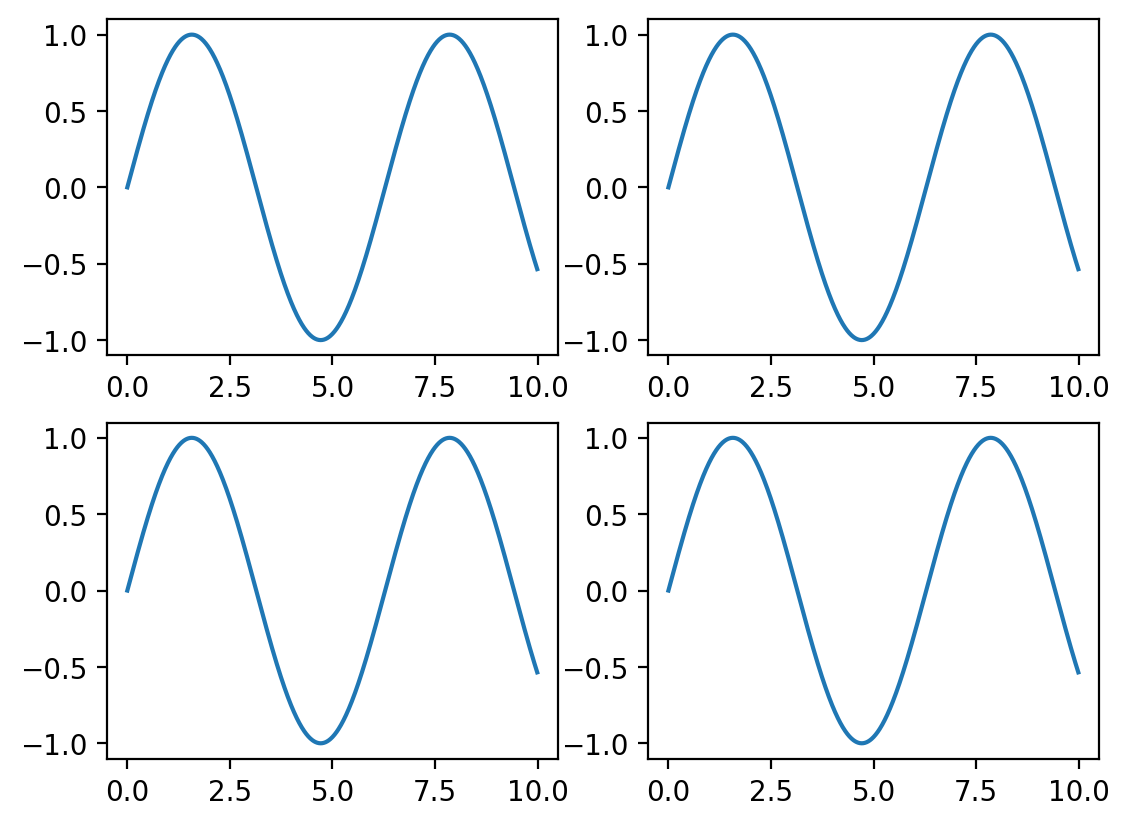

In [30]:
plt.subplot(2,2,1); plt.plot(x,np.sin(x))
plt.subplot(2,2,2); plt.plot(x,np.sin(x))
plt.subplot(2,2,3); plt.plot(x,np.sin(x))
plt.subplot(2,2,4); plt.plot(x,np.sin(x))
plt.show()

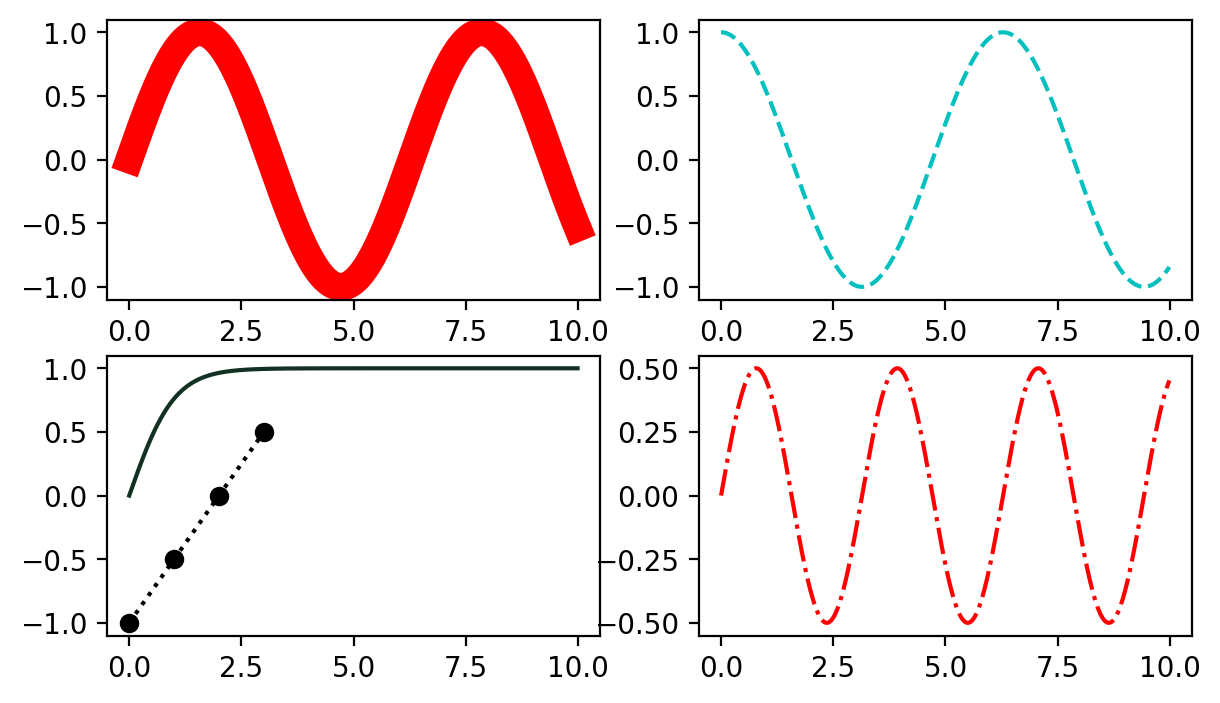

In [48]:
# 2행 2열 짜리 서브플롯
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(7,4))
axes[0,0].plot(x,np.sin(x),color='r',linewidth=10)
axes[0,1].plot(x,np.cos(x),'c--')#color='c',linestyle='--'
axes[1,0].plot(x,np.tanh(x),color='#123122')
# axes[1,0].plot([0,1,2,3],[-1,-0.5,0,0.5],'ko:') # k = black ,maker='o',linestyle=':'
axes[1,1].plot(x,np.sin(x)*np.cos(x),'r-.')

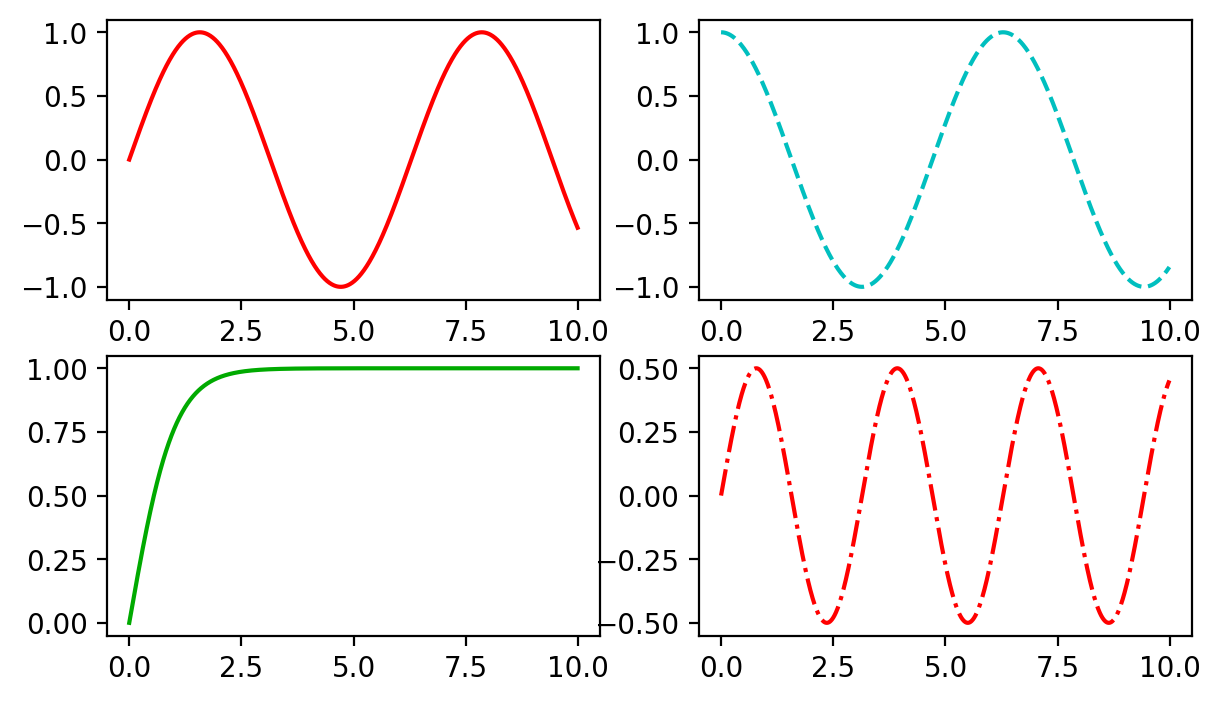

In [55]:
# 2행 2열 서브 플롯(for문 사용)
func_list = [np.sin,np.cos,np.tanh,lambda x:np.sin(x)*np.cos(x)]
fmt_list = ['r','c--','#00AA00','r-.']
fig,axes = plt.subplots(2,2,figsize=(7,4))
list(enumerate(axes.flat))
for idx, ax in enumerate(axes.flat):
    ax.plot(x,func_list[idx](x),fmt_list[idx])

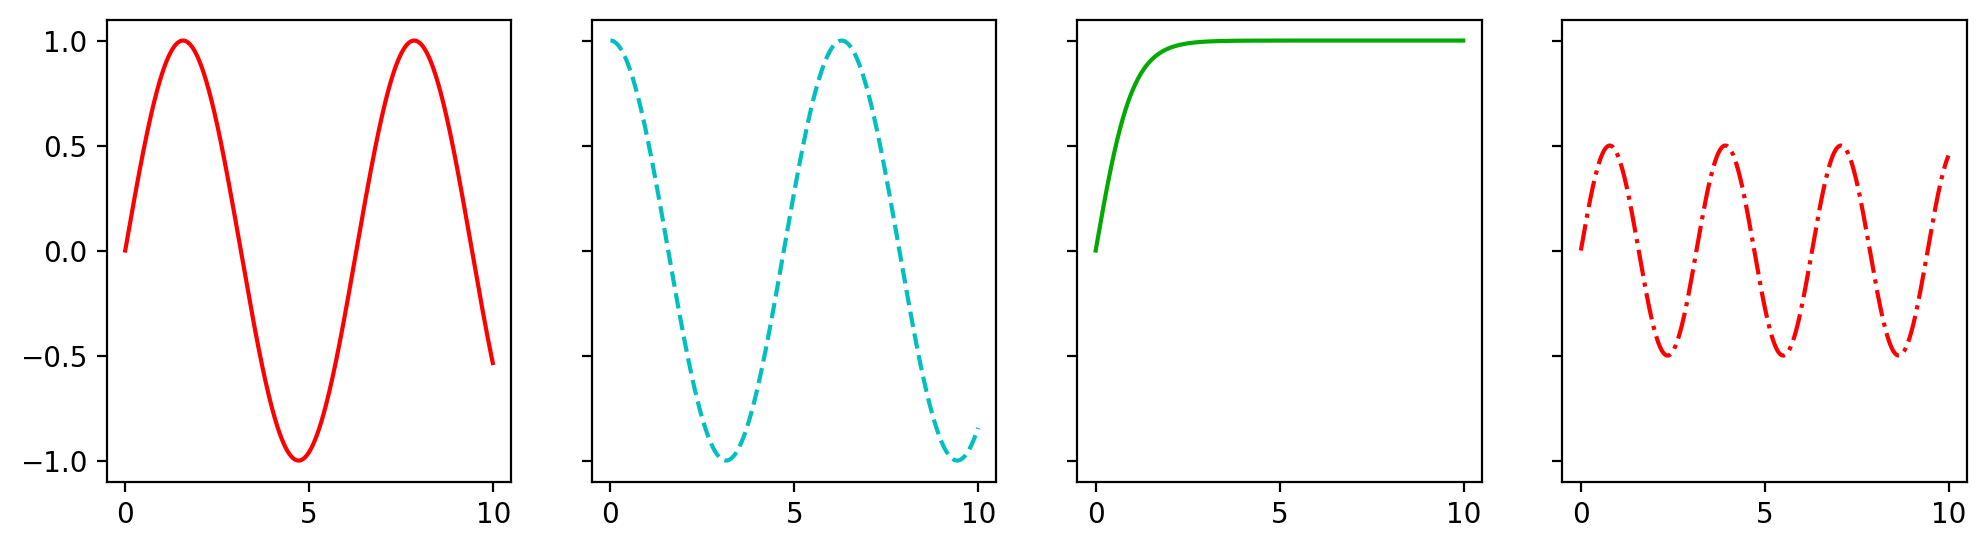

In [58]:
# 1행 4열 서브플롯
fig, axes = plt.subplots(ncols=4,figsize=(12,3),sharey=True)
for i, ax in enumerate(axes):
    ax.plot(x,func_list[i](x),fmt_list[i])

## 2.4 다양한 그래프 그리기
### 1) pyplot 함수들 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 2) matplotlib.pyplot.plot():선그래프

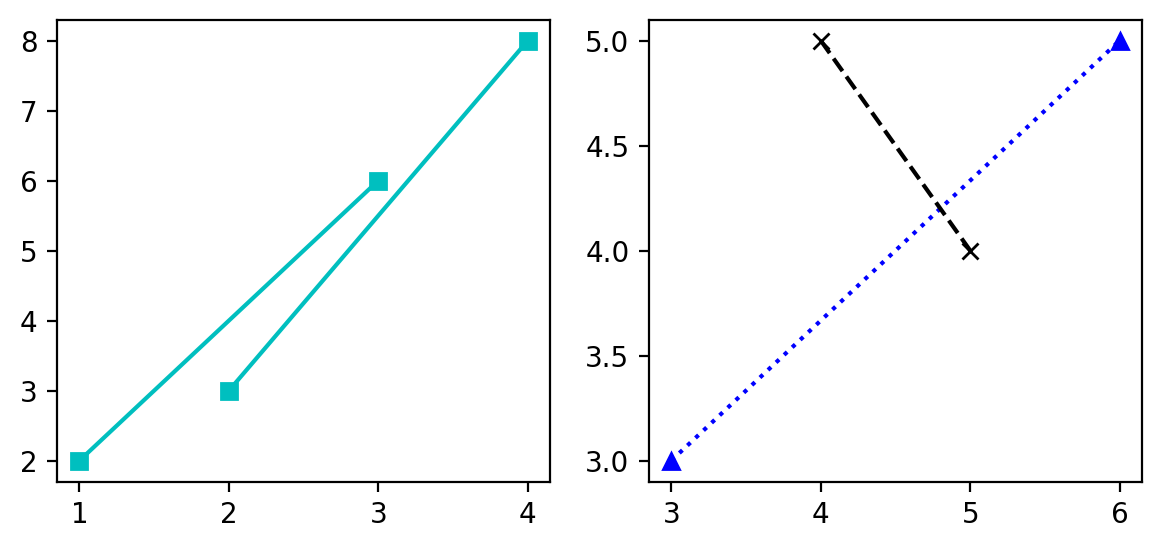

In [66]:
fig, axes = plt.subplots(ncols=2,figsize=(7,3))
axes[0].plot([[1,2],[3,4]],
            [[2,3],[6,8]],'cs-') #color='c', marker='s':사각마커, linestyle='-'실선
axes[1].plot([3,6],[3,5],'b^:') # color ='b',^(마커):(점선)
axes[1].plot([4,5],[5,4], 'kx--') # k(black),x(마커) --(대시드 점선)
plt.show()

### 3) pandas.DataFrame.plot()
- plt.plot(x,y,fmt) <br>
- df.plot(x=None, y=None,kind='line', figsize=None, title=None,grid =None,xlim,ylim,...)<br>
    * kind : line(기본값),scatter(점도표),bar,barh, box,density, pie...<br>
    * figsize :tuple(인치단위)
    * xlim, ylim : list/tuple

In [72]:
import seaborn as sns
iris=sns.load_dataset('iris')

- https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

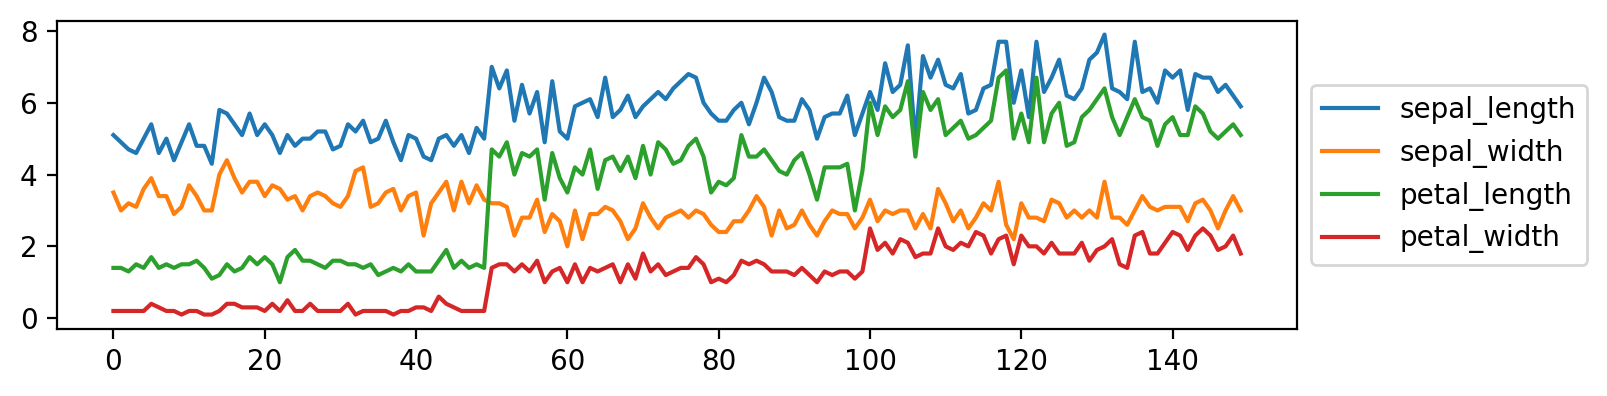

In [76]:
g=iris.plot(figsize=(8,2))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

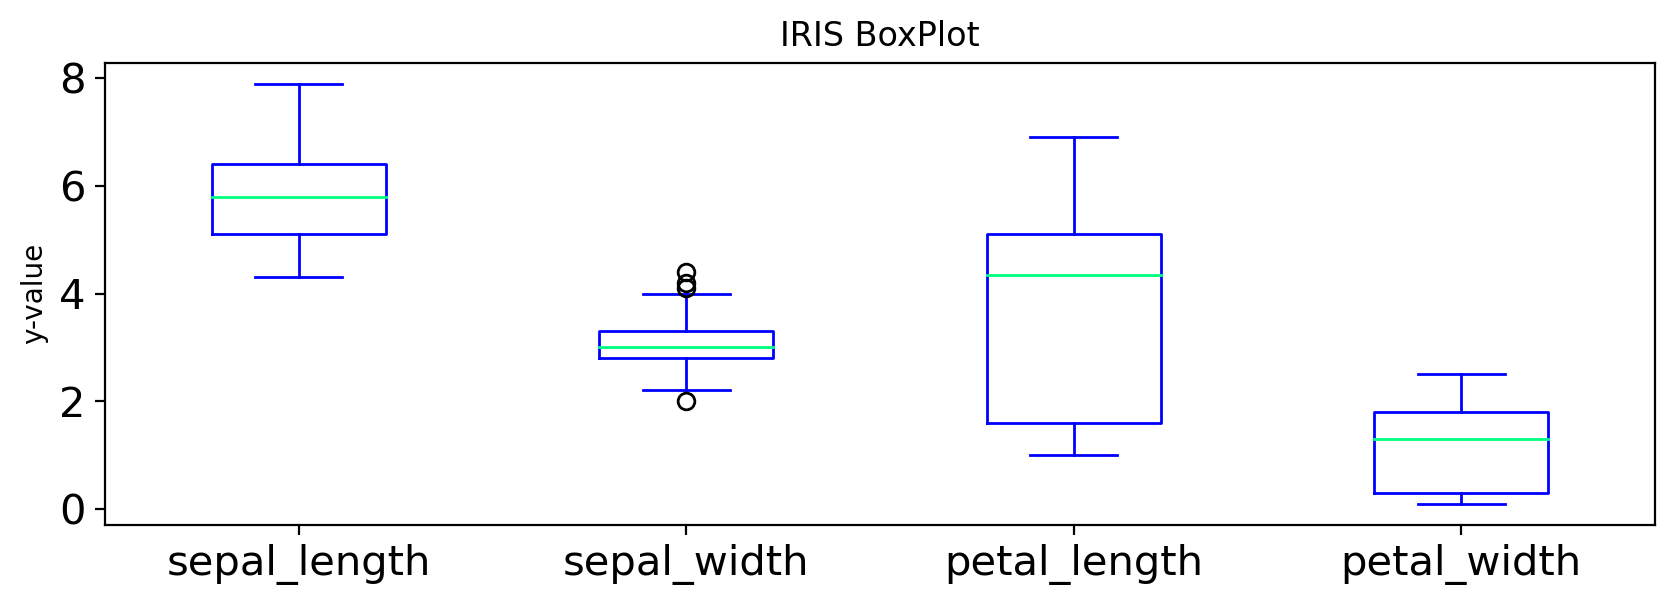

In [91]:
iris.plot(kind='box',figsize=(10,3),title='IRIS BoxPlot',
         ylabel='y-value',fontsize=15,colormap='winter')
plt.show()

In [87]:
iris.quantile(q=[0,0.25,0.5,0.75,1])

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


<Axes: xlabel='petal_length', ylabel='petal_width'>

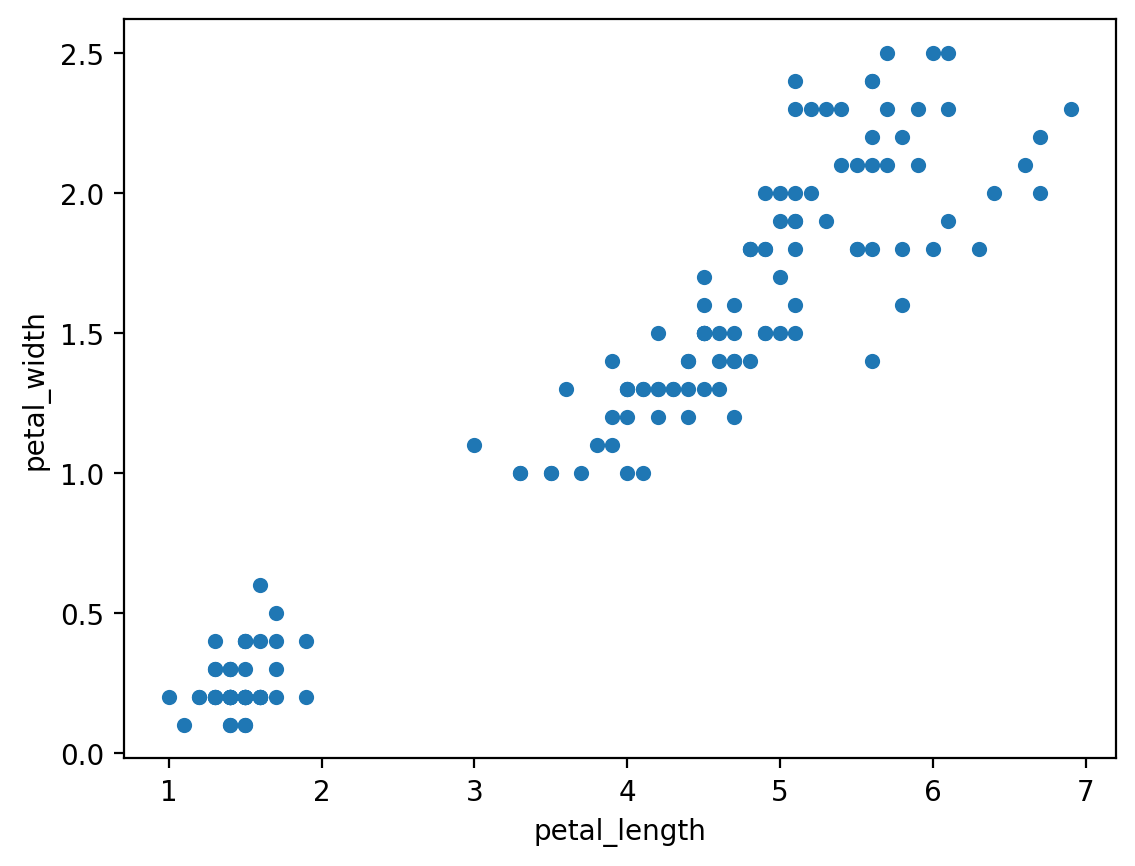

In [90]:
iris.plot(kind='scatter',x='petal_length',y='petal_width')

- https://ko.wikipedia.org/wiki/상자_수염_그림

- https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap)

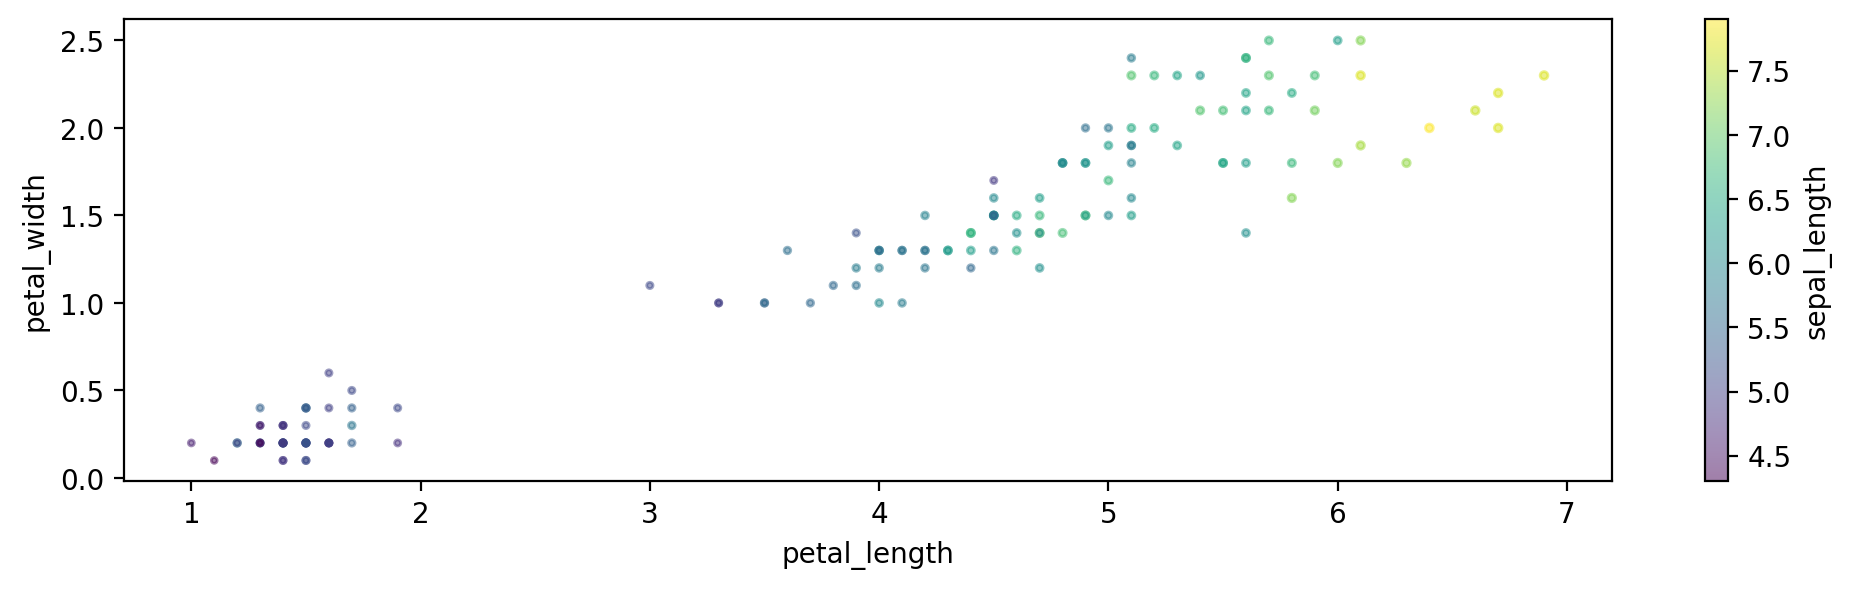

In [92]:
iris.plot(kind='scatter',x='petal_length', y = 'petal_width',figsize=(12,3),
         s='sepal_length', # s:점의 크기, c: 색상
         c='sepal_length',
         alpha=.5) # 투명도
plt.show()


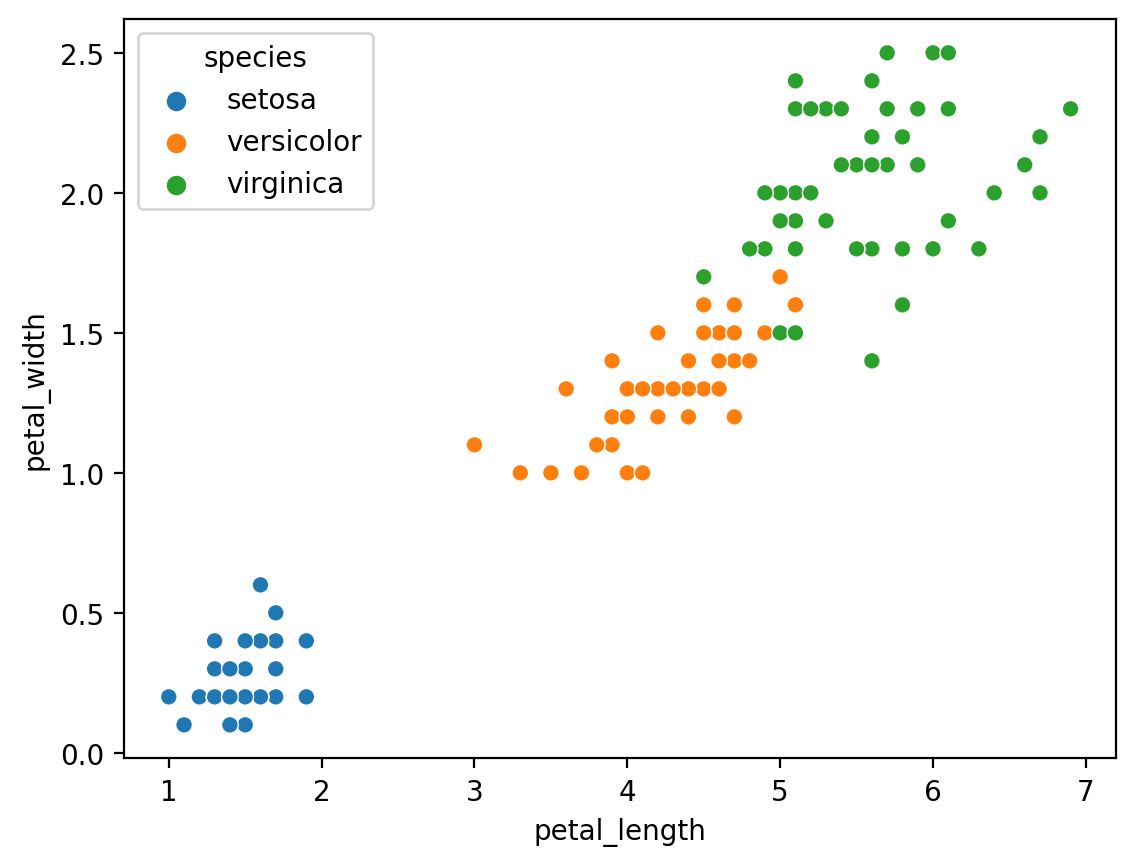

In [95]:
import seaborn as sns 
sns.scatterplot(data=iris,x='petal_length',y='petal_width',hue='species')
plt.show()

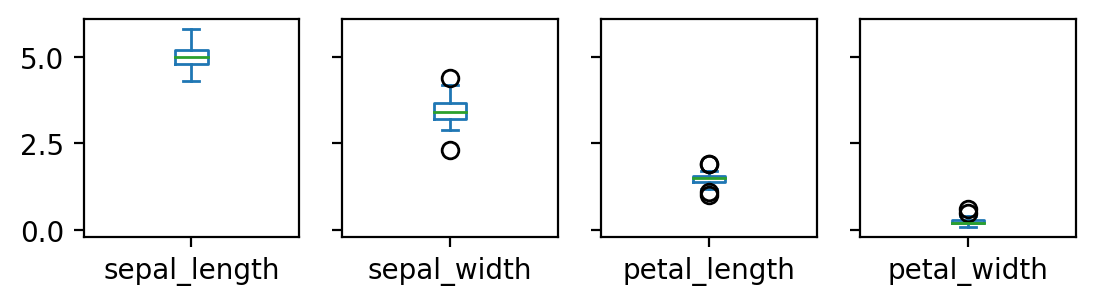

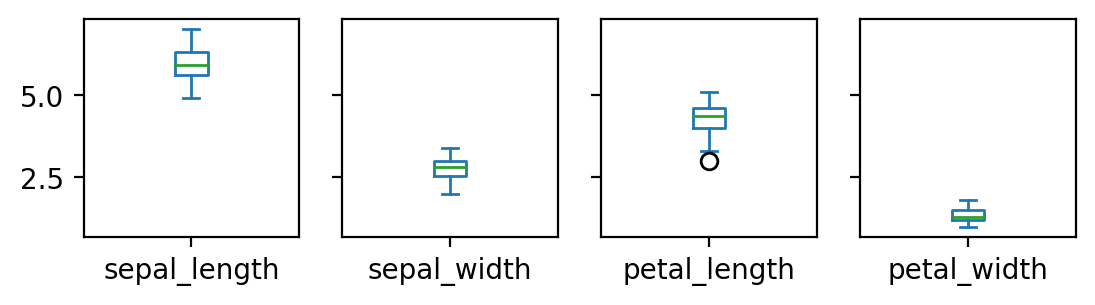

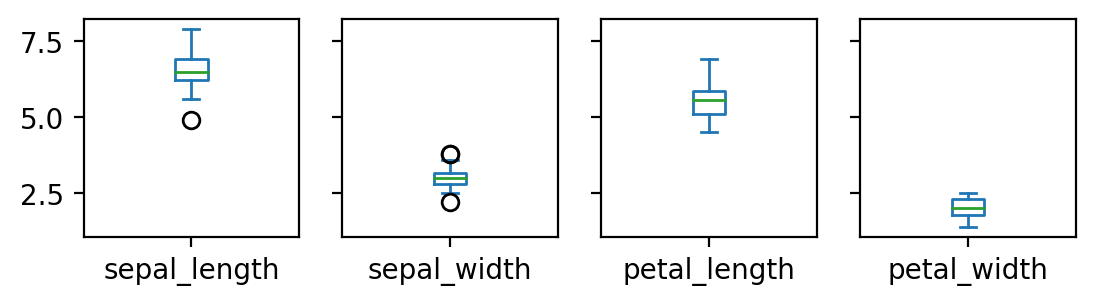

In [98]:
# 종별 boxplot
iris.groupby('species').plot(kind='box',
                            subplots=True,
                            layout=(3,4),
                            sharey=True) # y축 공유
plt.show()

### 4) plt.scatter():산점도

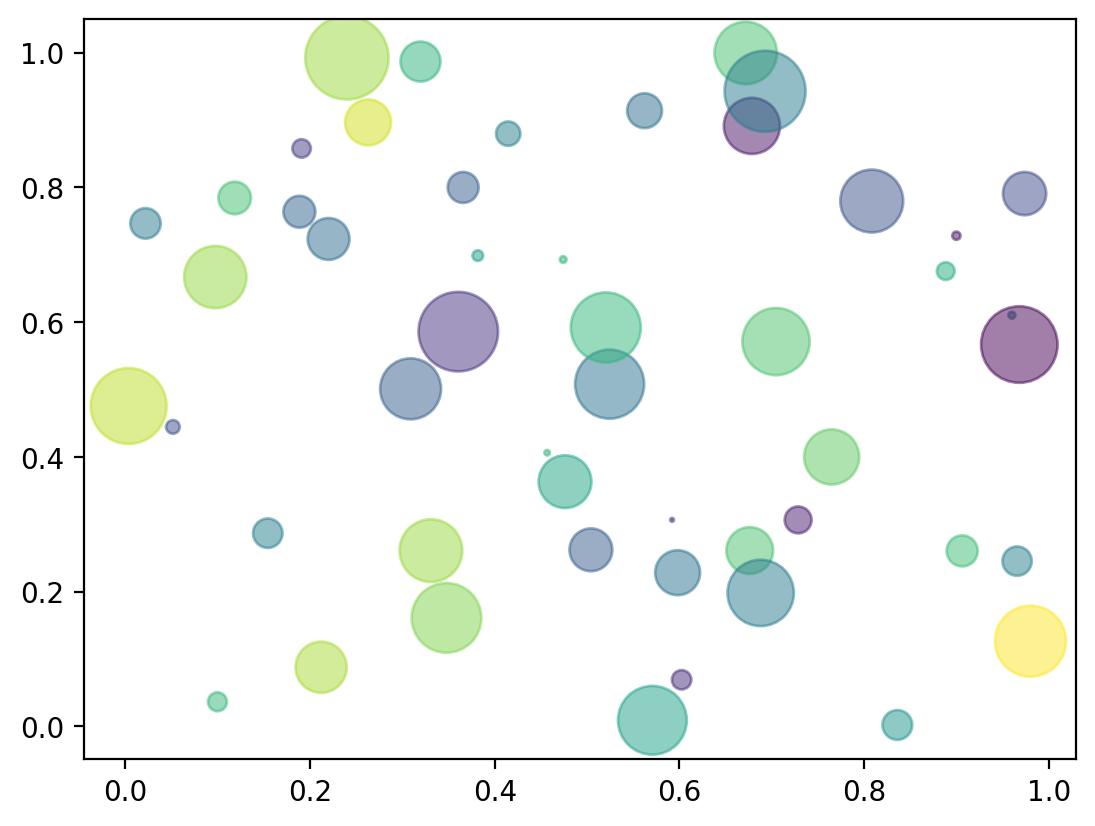

In [106]:
x = np.random.rand(50)
y = np.random.rand(50)
colors= np.random.rand(50)
area = (np.random.rand(50)*30)**2
plt.scatter(x,y, s= area,
           c=colors,
           alpha=.5
           )
plt.show()


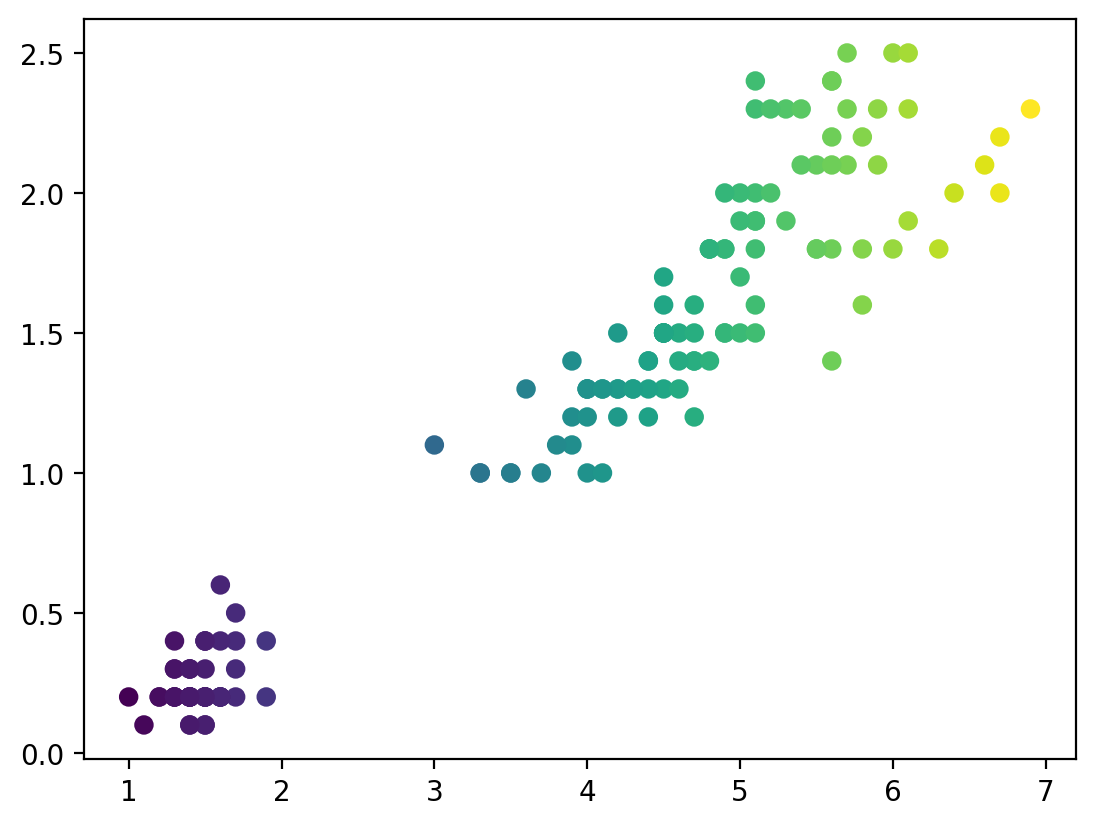

In [107]:
plt.scatter(x=iris.petal_length,y=iris.petal_width,
           c=iris.petal_length*20)

## 2.5) 그외 그래프 그리기 
### 1) fill(),fill_between(),scatter()
### 2) bar(),barh(),axvline(),axhline()
### 3) hist(히스토그램), boxplot(분포를 분석불가), violinplot()

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

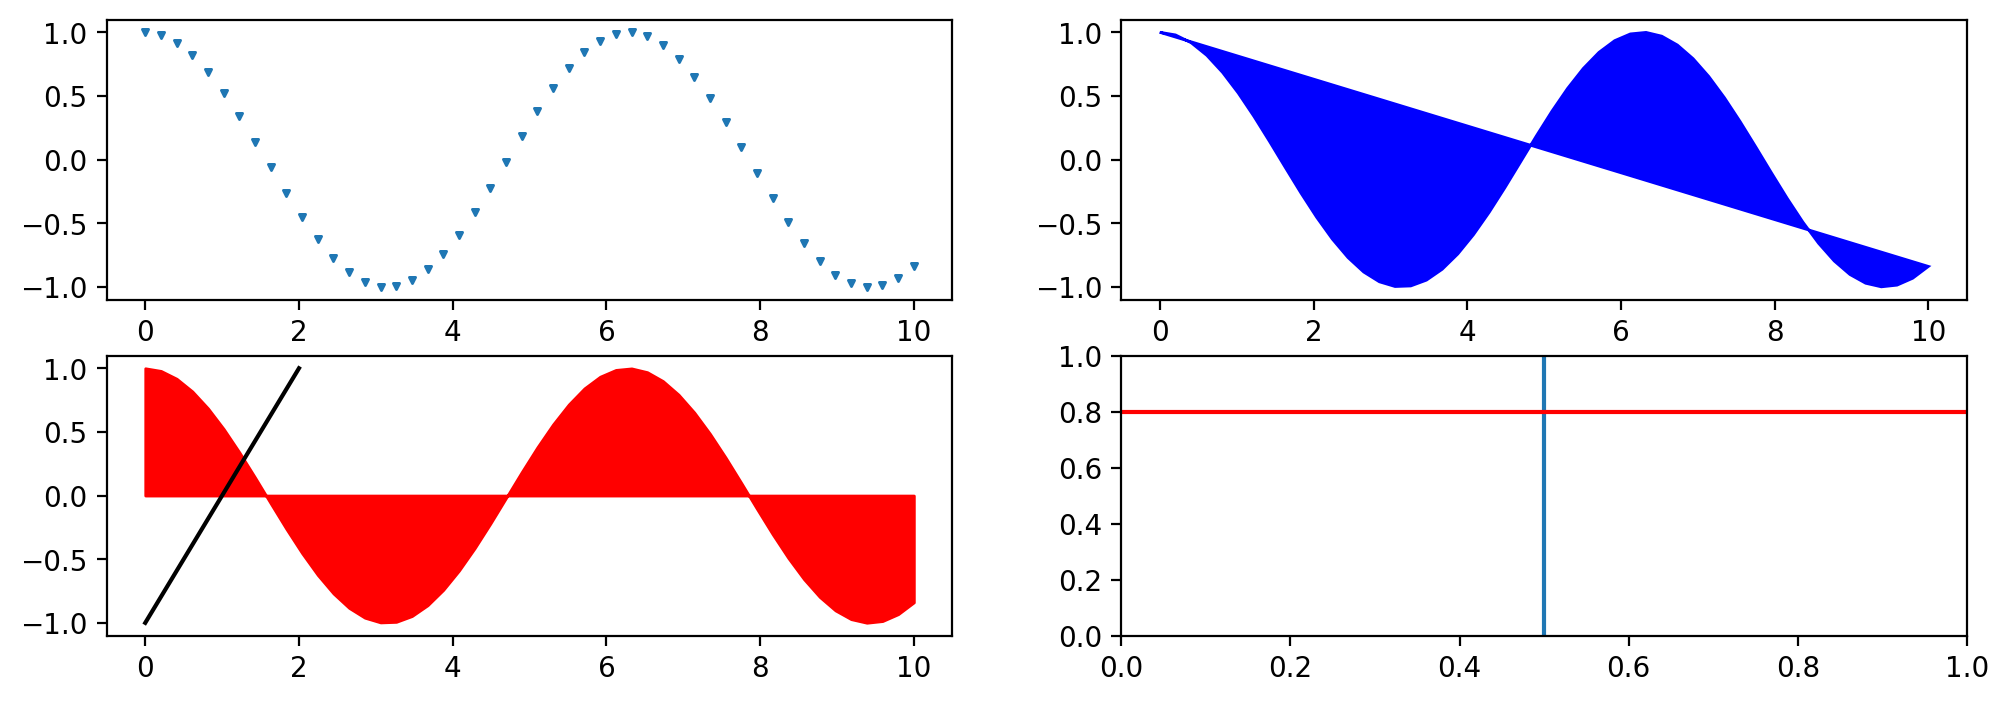

In [115]:
x= np.linspace(0,10,50) # 0부터 10까지 일정한 간경으로 50(기본값)개 수 추출
y= np.cos(x)
fig, axes = plt.subplots(2,2, figsize=(12,4))
axes[0,0].scatter(x,y,s=5,marker='v')
axes[0,1].fill(x,y,c='b')
axes[1,0].fill_between(x,y,color='r')
axes[1,0].plot([0,2],[-1,1],'k')
axes[1,1].axvline(0.5)
axes[1,1].axhline(0.8,c='r')
x 

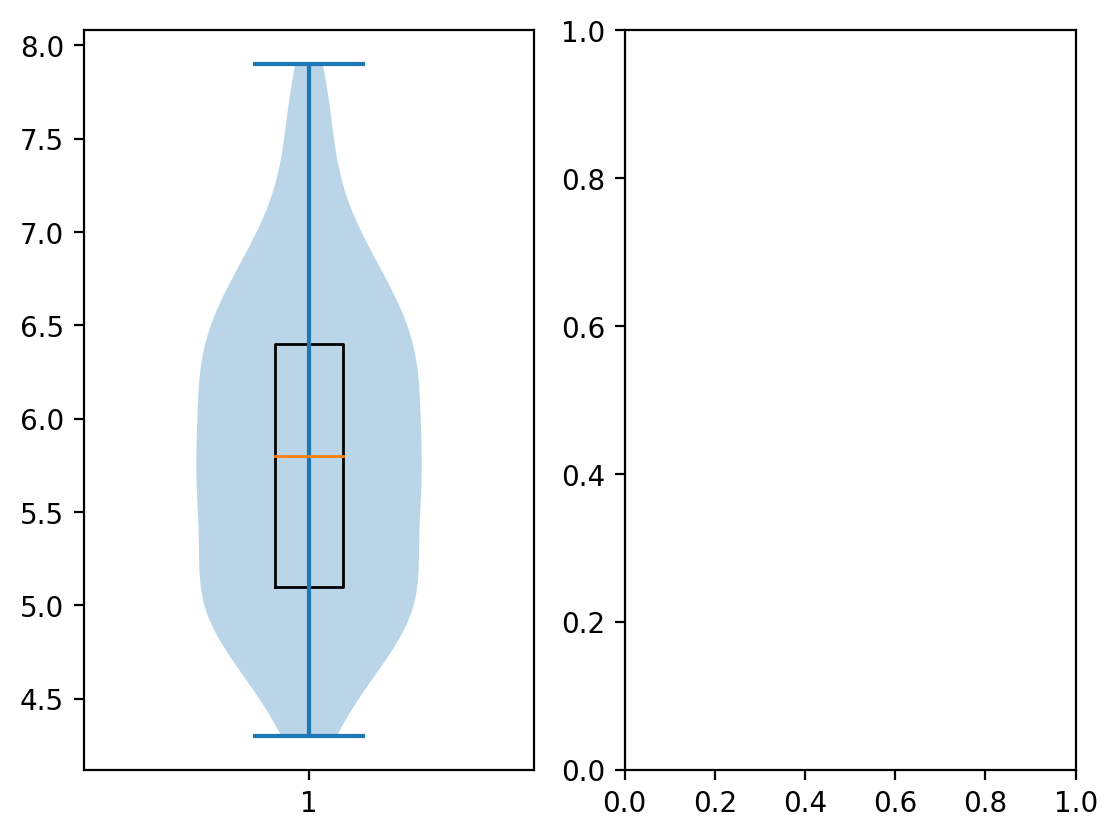

In [119]:
# boxplot vs. violinplot
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_length)
axes[0].violinplot(iris.sepal_length)
plt.show()

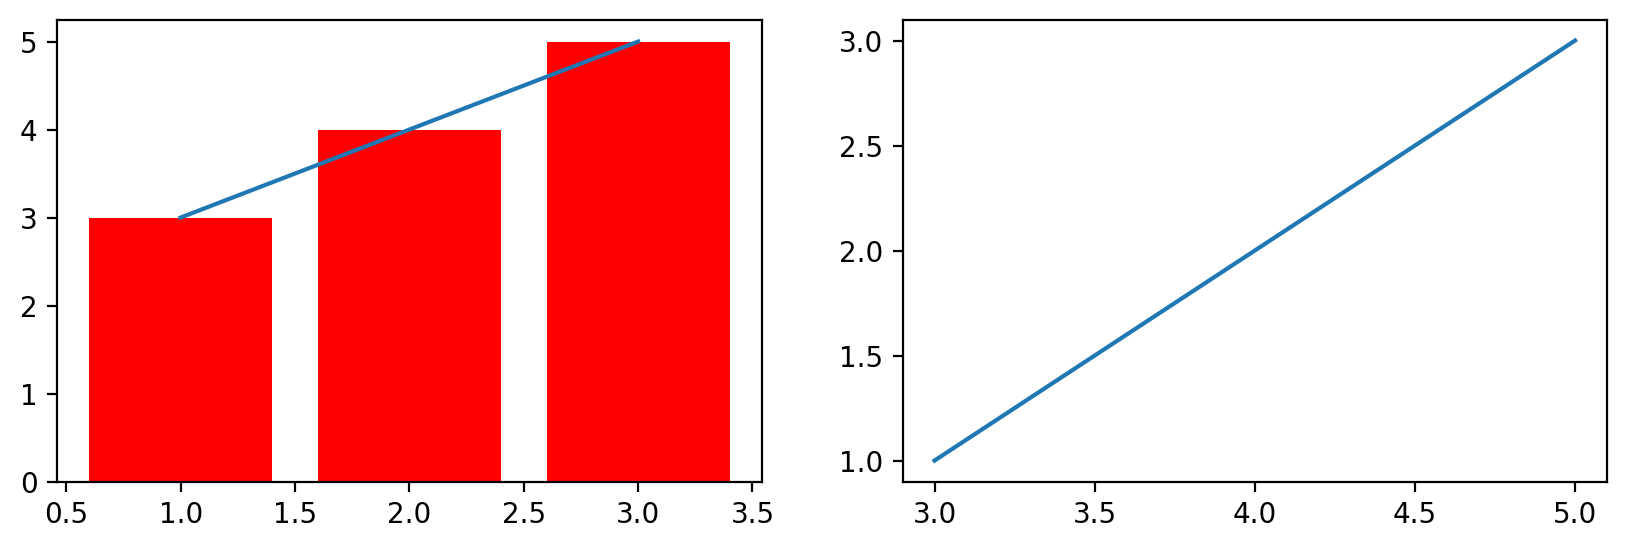

In [15]:
# bar,barh
x= [1,2,3]
y= [3,4,5]
fig , axes = plt.subplots(ncols=2, figsize=(10,3))
axes[0].bar(x,y,color='r') 

axes[1].plot(y,x)

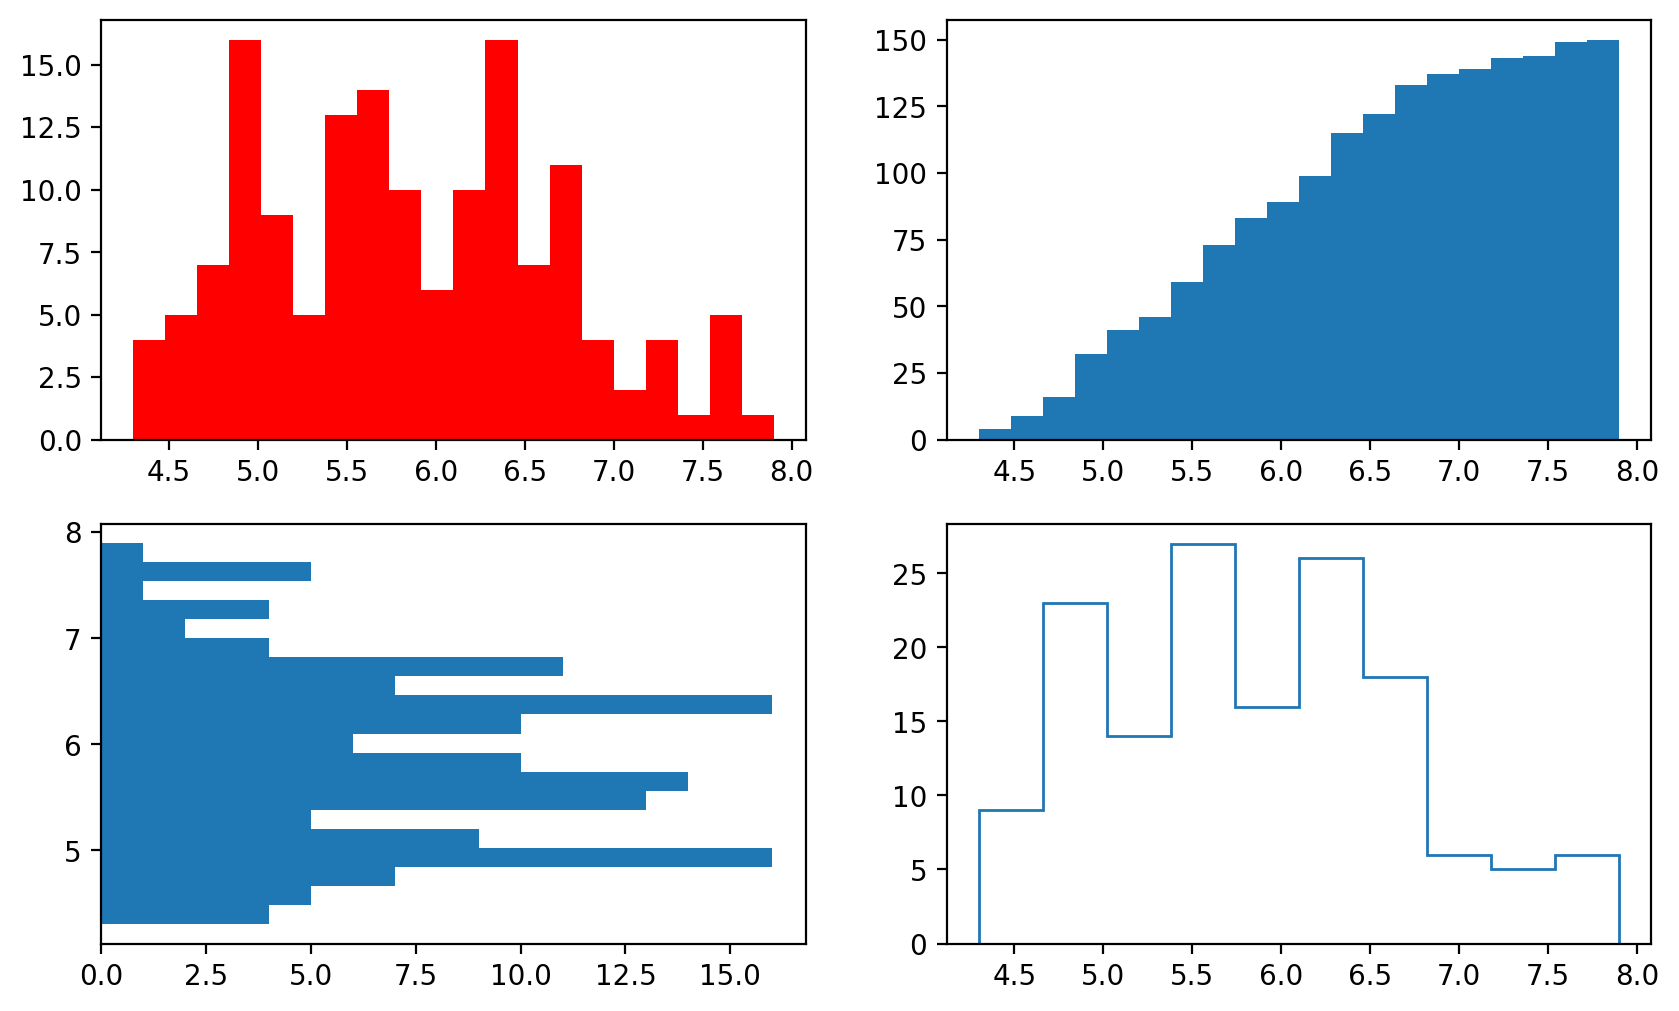

In [28]:
# hist- 히스토그램(도수분포표를 그래프화)
import seaborn as sns
iris = sns.load_dataset('iris')
fig, axes = plt.subplots(2,2,figsize=(10,6))
axes[0,0].hist(iris.sepal_length,bins=20,color='r')
axes[0,1].hist(iris.sepal_length,bins=20,cumulative=True)
axes[1,0].hist(iris.sepal_length,bins=20, orientation='horizontal')
axes[1,1].hist(iris.sepal_length,bins=10, histtype='step')
plt.show()

## 2.6 그래프 커스터마이징
### 1) linestyle, linewidth,color,marker
### 2)  https://matplotlib.org/stable/api/axes_api.html#text-and-annotations




In [49]:
# 한글 기본 폰트 설정 방법1
plt.rcParams['font.family']
plt.rc('font',family='Malgun Gothic') #윈도우즈
# plt.rc('font',family='AppleGothic') Mac
plt.rc('axes',unicode_minus=False) #축의 -

Text(0.5, 0.98, '메인타이틀')

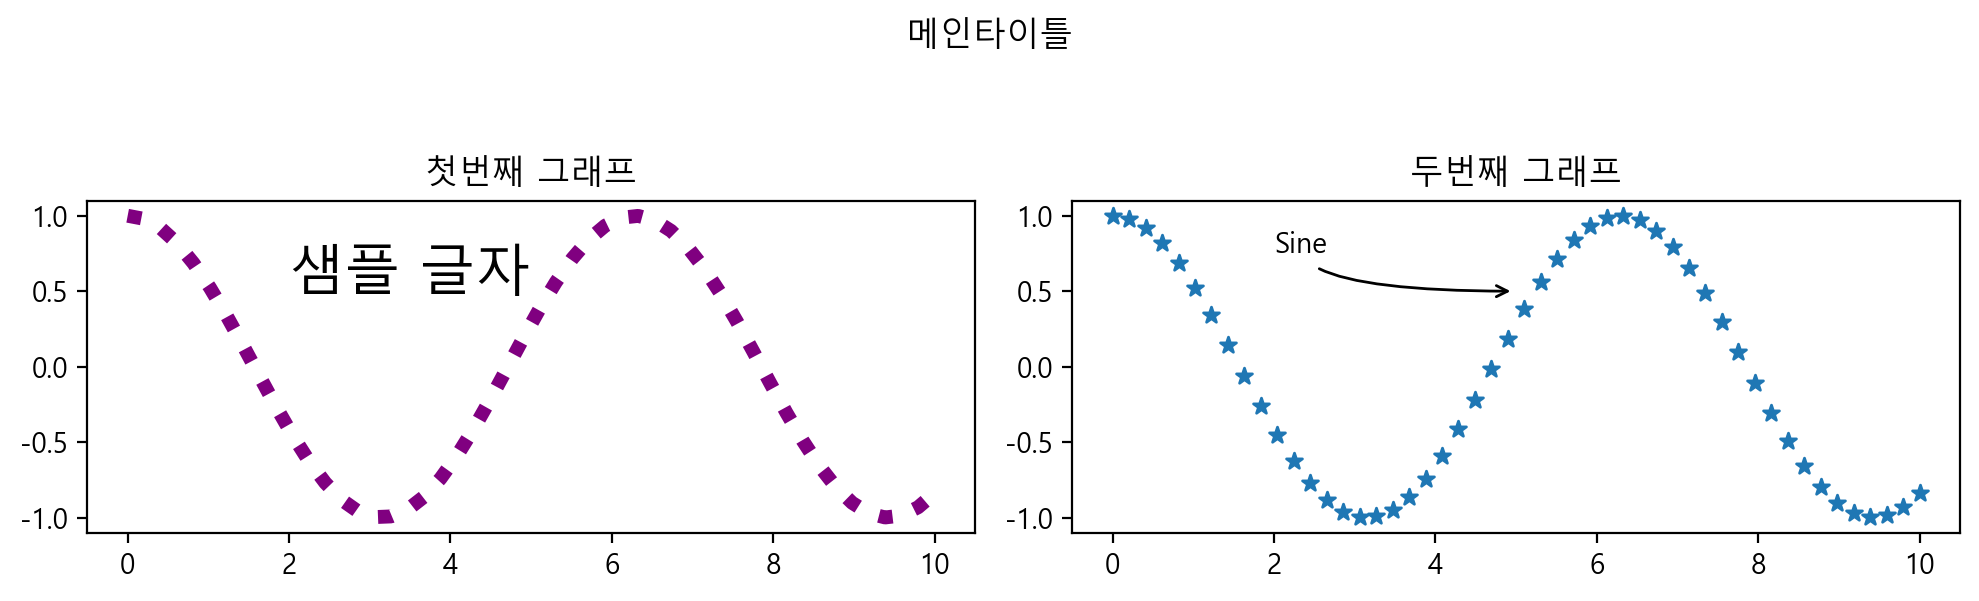

In [59]:
# 한글 특정 폰트 설정 방법1
from matplotlib.font_manager import FontProperties
font_path = 'C:/Windows/Fonts/HMKMRHD.TTF'
font_prop = FontProperties(fname = font_path,size = 20)
import numpy as np
x= np.linspace(0,10)
y= np.cos(x)
fig, axes = plt.subplots(1,2,figsize=(10,3))
axes[0].plot(x,y,linewidth=5,linestyle=':',color='purple')
axes[0].text(2,0.5,'샘플 글자',style='italic',fontsize=20)
axes[0].set_title('첫번째 그래프')

axes[1].scatter(x,y,marker='*')
axes[1].annotate('Sine',xytext=(2,0.75), # 글자가 있을 좌표 위치
                 xy=(5,0.5),
                 arrowprops= dict(arrowstyle='->',connectionstyle='angle3') # angle,angle3,arc,....
                )
axes[1].set_title('두번째 그래프')
# 레이아웃이 자동 조정
# rect = [left(0),bottom(0),right(1),top(1)] 각 경계의 상대적 비율
plt.tight_layout(rect=[0,0,1,0.8])
plt.suptitle('메인타이틀',fontx)

### 3)수학기호
- https://matplotlib.org/users/mathtext.html


Text(2, 0.75, '$\\sum_{i=0}^\\infty x_i$')

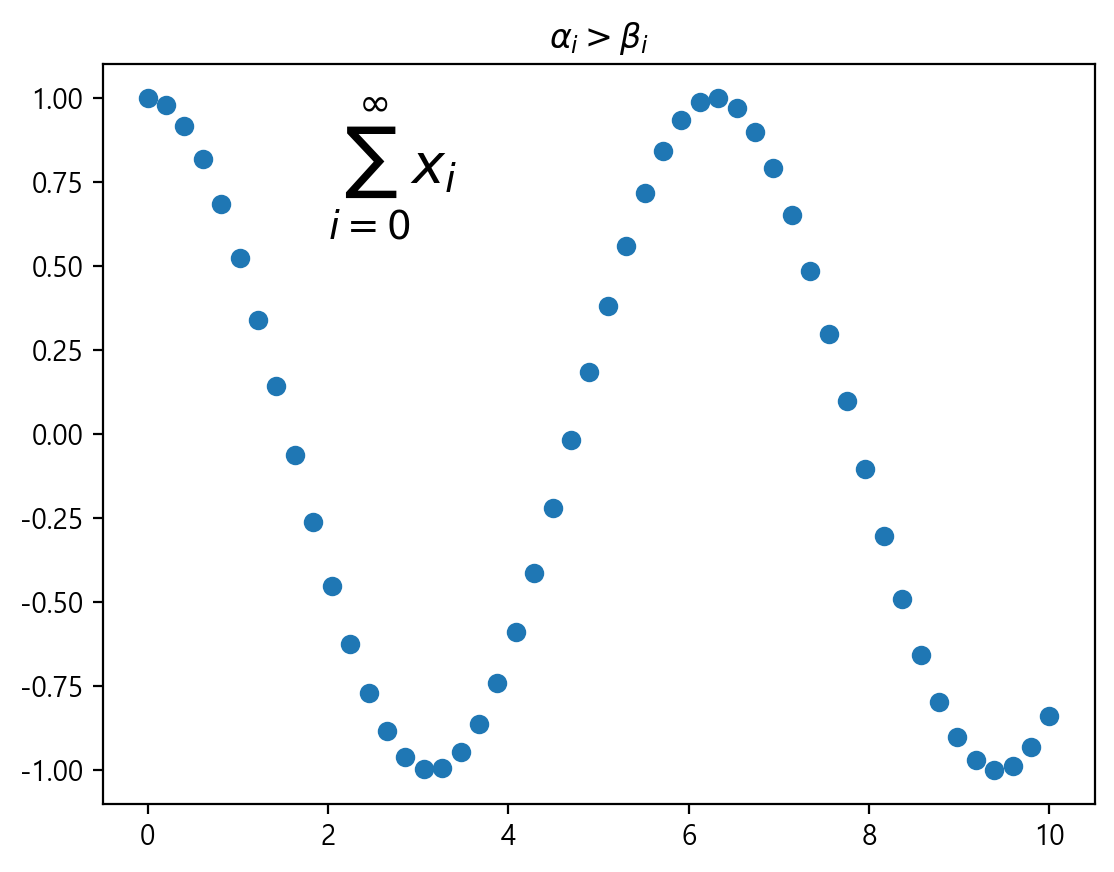

In [66]:
plt.scatter(x,y,marker='o')
plt.title(r'$\alpha_i>\beta_i$')
plt.text(2,0.75,r'$\sum_{i=0}^\infty x_i$', fontsize=20)


### 4) 축과 눈금

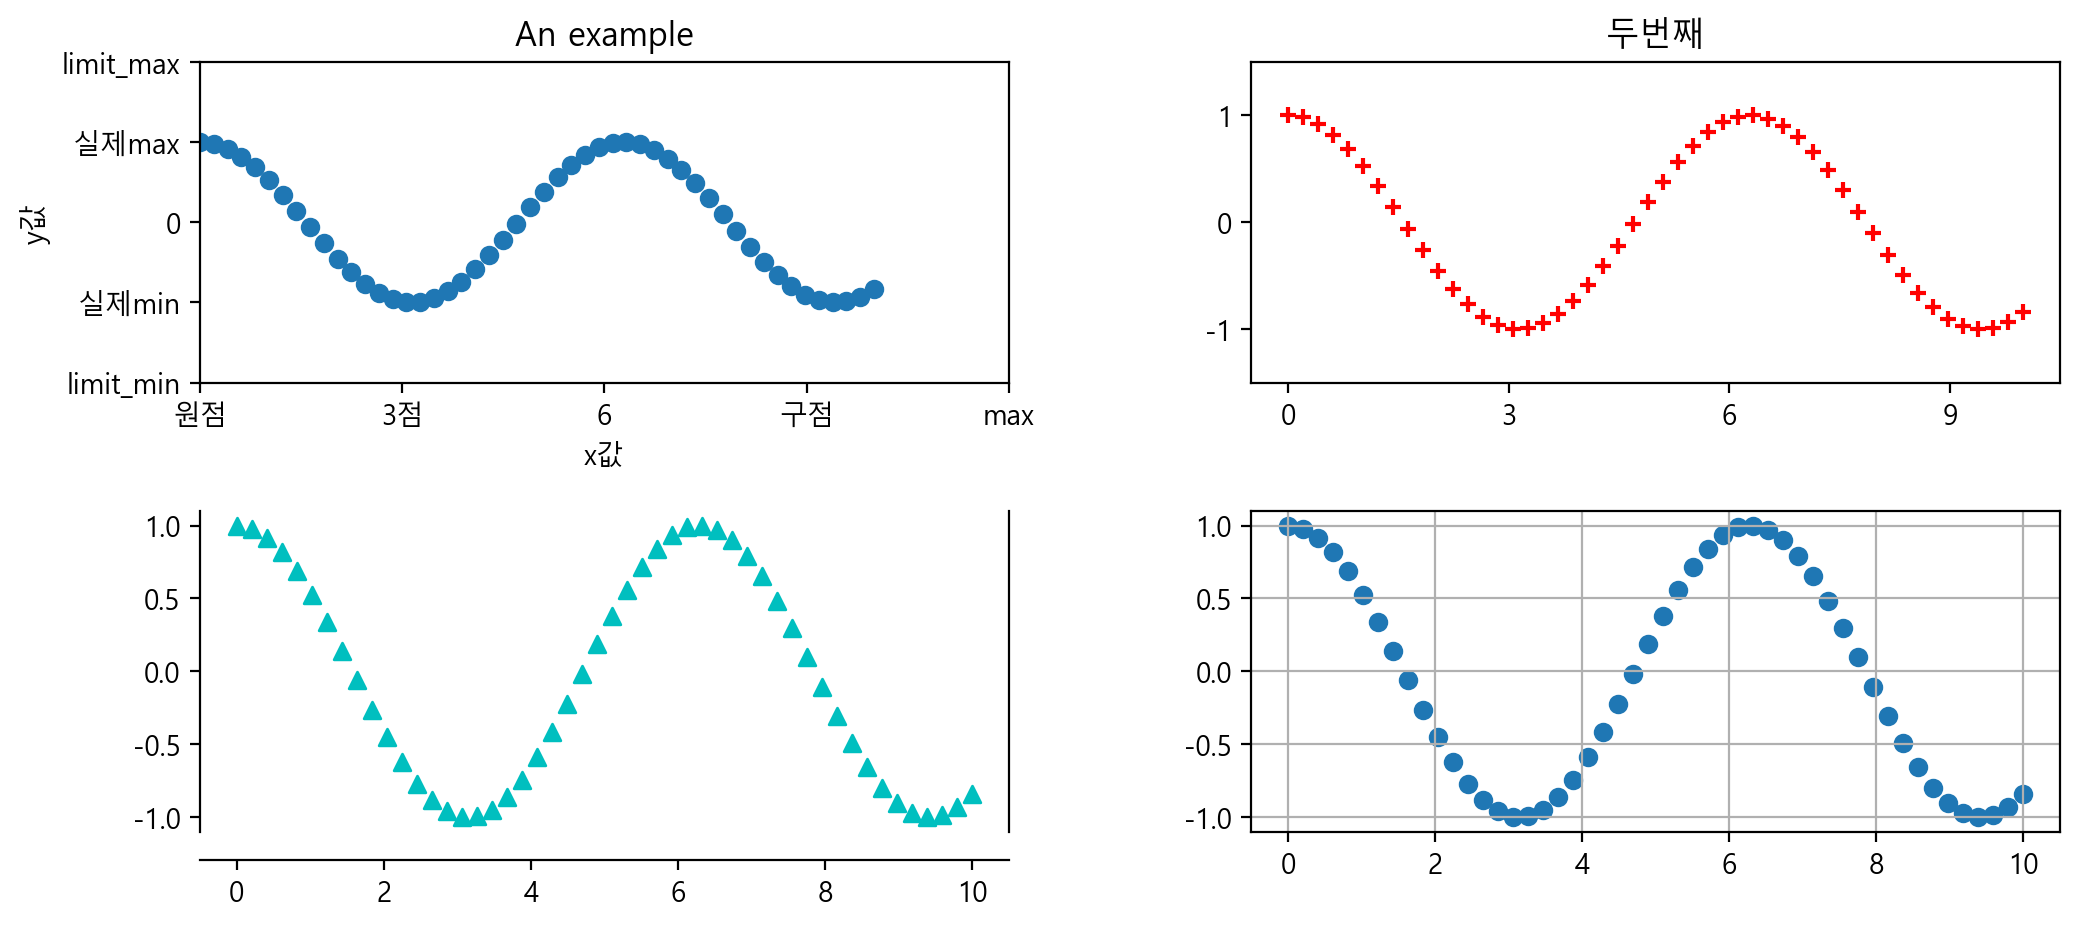

In [79]:
x = np.linspace(0, 10) # 0부터 10까지 일정한 간격의 50개 값을 배열
y = np.cos(x)
fig, axes = plt.subplots(2, 2, figsize=(12,5))
# subplot들끼리의 여백 조정
plt.subplots_adjust(hspace=0.4, wspace=0.3) # hspace위아래여백, wspace좌우여백
axes[0,0].scatter(x, y)
axes[0,0].set(title='An example', ylabel='y값', xlabel='x값',
             xlim=[0, 12], # x축 눈금의 범위
             ylim=[-2,2],  # y축 눈금의 범위
             xticks=[0,3,6,9,12], # x축 눈금
             xticklabels = ['원점','3점', 6, '구점','max'], # x축 눈금 라벨
             yticks=[-2,-1, 0, 1, 2],
             yticklabels = ['limit_min', '실제min',0,'실제max','limit_max']
             )
axes[0,1].scatter(x, y, color='r', marker='+')
axes[0,1].set_title('두번째')
axes[0,1].set_xticks(range(0,11,3))
axes[0,1].set_ylim(-1.5,1.5)
axes[1,0].scatter(x, y, color='c', marker='^')
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['bottom'].set_position( ('outward', 10) )
axes[1,1].scatter(x, y)
axes[1,1].grid(True)
plt.show()

### 5) 축공유 ★

In [82]:
x = np.arange(0,10)
y1= 0.5*x**2
y2= -y1

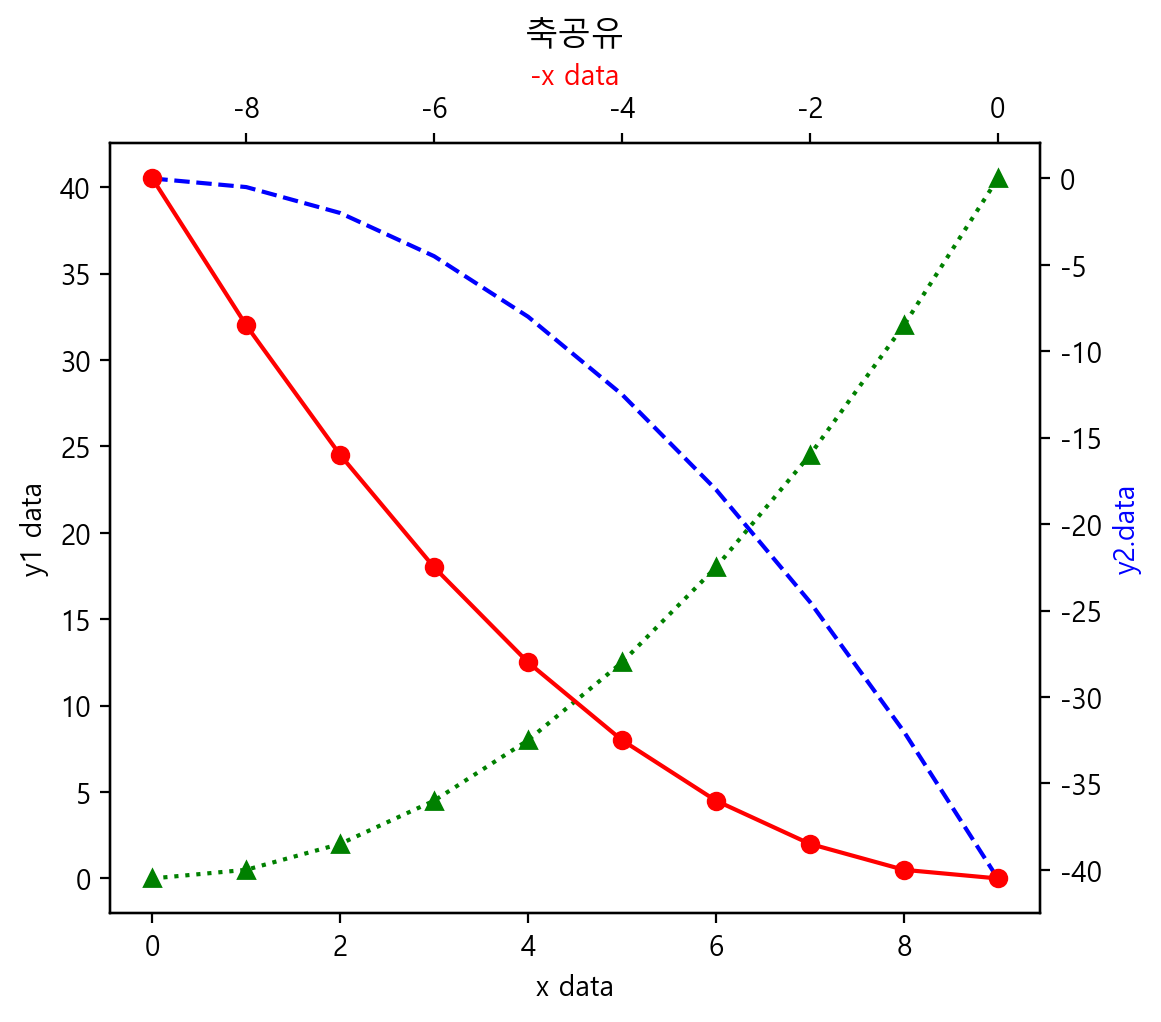

In [86]:
fig , ax1 = plt.subplots(figsize=(6,5))
ax1.plot(x,y1,'g^:')
ax1.set(title='축공유', xlabel='x data', ylabel='y1 data')

ax2 = ax1.twinx() # ax1과 x 축을 공유하는 ax2
ax2.plot(x,y2,'b--')
ax2.set_ylabel('y2.data',color='b')
ax3 = ax1.twiny() # a1과 y축을 공유하는 ax3
ax3.plot(-x,y1,'ro-')
ax3.set_xlabel('-x data', color='r')
plt.show()

### 6) 범례표시
- https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot 
### 7) 플롯 스타일 지정 (plt.rc())
- 플롯 스타일 지정시 프롯의 기존 설정 값이 초기화
    * plt.rc('font',family='Malgun Gothic') # 윈도우즈
    * plt.rc('axes',unicode_minus=False)# 축의 -깨짐방지

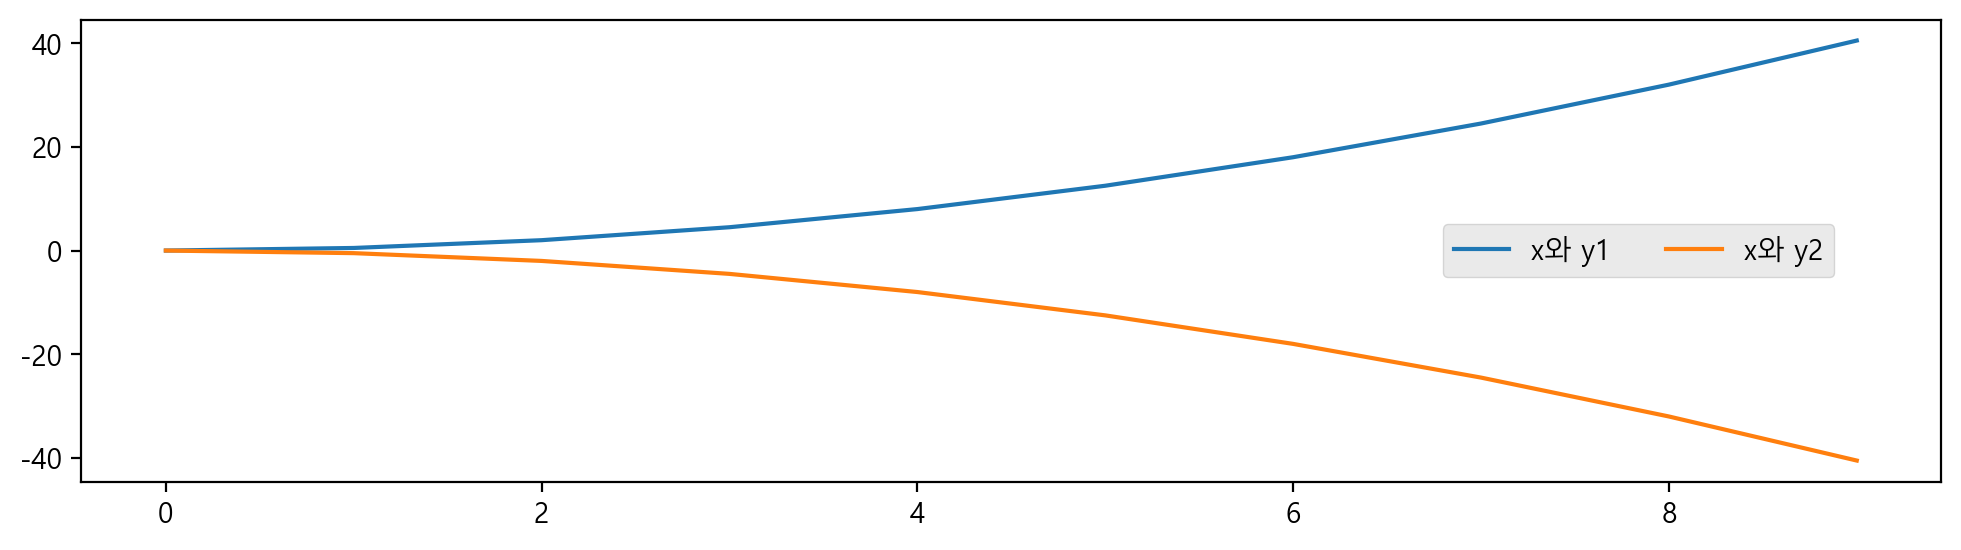

In [93]:
fig , ax = plt.subplots(figsize=(12,3))
plt.style.use('ggplot') # default,ggplot,seaborn,classic
plt.rc('font',family='Malgun Gothic') # 윈도우즈
plt.rc('axes',unicode_minus=False)# 축의 -깨짐방지
ax.plot(x,y1,label = 'x와 y1')
ax.plot(x,y2,label = 'x와 y2')
plt.legend(loc='center right',ncol=2, bbox_to_anchor=(0.95,0.5))